In [56]:
from torch import nn
import numpy as np
import torch
import matplotlib.pyplot as plt

In [57]:
# Creating a function f(X) with a slope of -5 and bias of -4
slope = -5
bias = -4
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = slope * X + bias
 
# Adding Gaussian noise to the function f(X) and saving it in Y
noise = 1.4 * torch.randn(X.size())
Y = func + noise

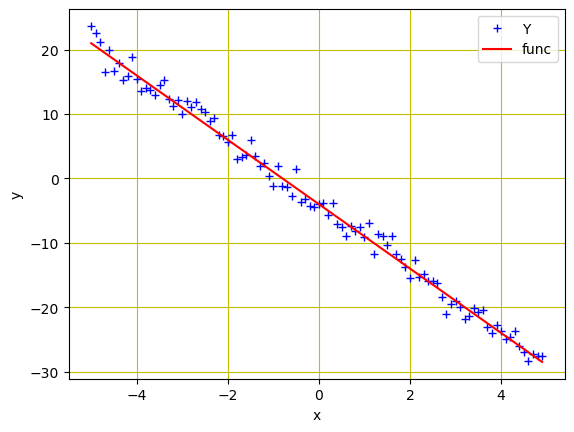

In [58]:

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [59]:
'''
class Feedforward(torch.nn.Module):

        def __init__(self, x, y):
            super().__init__()
            
            self.w = torch.tensor(-10.0, requires_grad=True)
            self.b = torch.tensor(-20.0, requires_grad=True)

            self.step_size = 0.1
            self.loss_BGD = []
            self.n_iter = 20

            self.iterate(x, y, self.n_iter)

            
        def forward(self, x):
            return self.w * x + self.b 

        def iterate(self, x, y, n_iter):
            for i in range(n_iter):
                y_pred = self.forward(x)
                loss = self.criterion(y_pred, y)
                self.loss_BGD.append(loss.item())
                loss.backward()

                self.w.data = self.w.data - self.step_size * self.w.grad.data
                self.b.data = self.b.data - self.step_size * self.b.grad.data

                self.w.grad.data.zero_()
                self.b.grad.data.zero_()

                print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), self.w.item(), self.b.item()))
'''

"\nclass Feedforward(torch.nn.Module):\n\n        def __init__(self, x, y):\n            super().__init__()\n            \n            self.w = torch.tensor(-10.0, requires_grad=True)\n            self.b = torch.tensor(-20.0, requires_grad=True)\n\n            self.step_size = 0.1\n            self.loss_BGD = []\n            self.n_iter = 20\n\n            self.iterate(x, y, self.n_iter)\n\n            \n        def forward(self, x):\n            return self.w * x + self.b \n\n        def iterate(self, x, y, n_iter):\n            for i in range(n_iter):\n                y_pred = self.forward(x)\n                loss = self.criterion(y_pred, y)\n                self.loss_BGD.append(loss.item())\n                loss.backward()\n\n                self.w.data = self.w.data - self.step_size * self.w.grad.data\n                self.b.data = self.b.data - self.step_size * self.b.grad.data\n\n                self.w.grad.data.zero_()\n                self.b.grad.data.zero_()\n\n               

In [60]:
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.l1 = nn.Linear(input_size, output_size)


    def forward(self, x):
        output = self.l1(x)
        return output

In [61]:

# Instanciate the model
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = Feedforward(1, 1)
#model_0 = None # REPLACE 'None' BY YOUR MODEL
# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters()) 

[Parameter containing:
 tensor([[0.1564]], requires_grad=True),
 Parameter containing:
 tensor([-0.8799], requires_grad=True)]

In [62]:
# Create a loss function

y_pred = model_0.forward(X)

def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

loss_fn = criterion(y_pred, Y)
# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate

In [63]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [64]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 500

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

### Training
for epoch in range(epochs):
    # Put model in training mode (this is the default state of a model)
    model_0.train()

    ### Feed-Forward propagation
    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0.forward(X_train)
    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = criterion(y_pred, y_train)

    ### Backpropagation
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Progress the optimizer
    optimizer.step()

    ### Testing
    # Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0.forward(X_test)
      # 2. Caculate loss on test data
      test_loss = criterion(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type
      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss} ")

Epoch: 0 | Train Loss: 150.3036346435547 | Test Loss: 452.6099548339844 
Epoch: 10 | Train Loss: 19.04068946838379 | Test Loss: 84.23028564453125 
Epoch: 20 | Train Loss: 9.119341850280762 | Test Loss: 32.3321647644043 
Epoch: 30 | Train Loss: 6.884158134460449 | Test Loss: 18.912532806396484 
Epoch: 40 | Train Loss: 5.554989814758301 | Test Loss: 12.997121810913086 
Epoch: 50 | Train Loss: 4.610626220703125 | Test Loss: 9.431419372558594 
Epoch: 60 | Train Loss: 3.9287853240966797 | Test Loss: 6.997476100921631 
Epoch: 70 | Train Loss: 3.4358458518981934 | Test Loss: 5.269064426422119 
Epoch: 80 | Train Loss: 3.0794365406036377 | Test Loss: 4.0275774002075195 
Epoch: 90 | Train Loss: 2.8217403888702393 | Test Loss: 3.1331775188446045 
Epoch: 100 | Train Loss: 2.6354165077209473 | Test Loss: 2.48846435546875 
Epoch: 110 | Train Loss: 2.500697612762451 | Test Loss: 2.0238394737243652 
Epoch: 120 | Train Loss: 2.4032907485961914 | Test Loss: 1.6891546249389648 
Epoch: 130 | Train Loss: 2

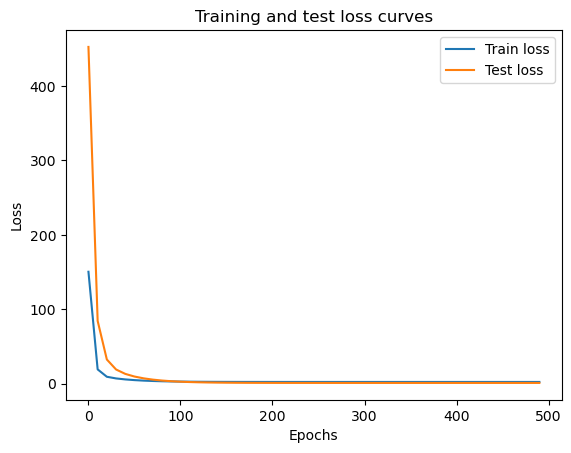

In [65]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [66]:
# Find our model's learned parameters
print(list(model_0.parameters()))
print("Slope:", slope)
print("Bias: ", bias)
## PLEASE PRINT THE PARAMATERS LEARNED VS THE ACTUAL PARAMETERS

[Parameter containing:
tensor([[-5.0120]], requires_grad=True), Parameter containing:
tensor([-3.9185], requires_grad=True)]
Slope: -5
Bias:  -4


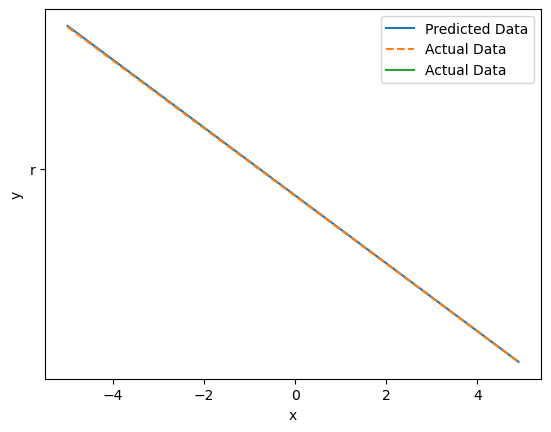

In [67]:
# PLOT THE POINTS AND THE FUNCTION LEARNED
y_pred = model_0.forward(X)
#print(y_pred)
plt.plot(X.detach().numpy(), y_pred.detach().numpy(), label="Predicted Data")
plt.plot(X.numpy(), func.numpy(), '--','r', label= 'Actual Data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()